https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [ ]:
# Las CONSTANTES como por ejemplo el año '2016' puede que se aporta poco o nada

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
import sklearn.metrics 

In [31]:
df = pd.read_csv('./data/temps.csv')
df.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [33]:
# de Fahrenheit a Celsius y cambiar las unidades de 'actual'
def conversor(fahrenheit):
   return round(((fahrenheit -32) * (5/9)),2)

In [34]:
print('Fahrenheit',df['average'][0])
'Celsius ' + str(conversor(df['average'][0]))

Fahrenheit 45.6


'Celsius 7.56'

In [35]:
df.columns[4:]

Index(['temp_2', 'temp_1', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [36]:
df['temp_2'].apply(lambda x: conversor(x))

0      7.22
1      6.67
2      7.22
3      6.67
4      5.00
       ... 
343    5.56
344    5.56
345    8.33
346    8.89
347    8.89
Name: temp_2, Length: 348, dtype: float64

In [37]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [38]:
for col in df.columns[4:]:
    df[col] = df[col].apply(lambda x: conversor(x))

df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,7.22,7.22,7.56,7.22,6.11,10.00,6.67,-1.67
1,2016,1,2,Sat,6.67,7.22,7.61,6.67,5.00,10.00,6.67,16.11
2,2016,1,3,Sun,7.22,6.67,7.67,5.00,6.11,7.78,8.33,13.33
3,2016,1,4,Mon,6.67,5.00,7.72,4.44,6.67,8.89,7.78,11.67
4,2016,1,5,Tues,5.00,4.44,7.78,6.67,7.78,7.78,7.78,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,5.56,5.56,7.33,8.33,5.00,10.00,8.33,8.33
344,2016,12,28,Wed,5.56,8.33,7.39,8.89,5.00,9.44,6.67,14.44
345,2016,12,29,Thurs,8.33,8.89,7.39,8.89,6.11,10.00,7.22,18.33
346,2016,12,30,Fri,8.89,8.89,7.44,13.89,6.67,7.78,6.67,5.56


### 2. Lidia con las variables categóricas del dataset

In [39]:
#own solution
dummy_df = pd.get_dummies(df, prefix=['week'], drop_first=True)

In [40]:
dummy_df.head(10)
#Omite 'fri'

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,7.22,7.22,7.56,7.22,6.11,10.00,6.67,-1.67,0,0,0,0,0,0
1,2016,1,2,6.67,7.22,7.61,6.67,5.00,10.00,6.67,16.11,0,1,0,0,0,0
2,2016,1,3,7.22,6.67,7.67,5.00,6.11,7.78,8.33,13.33,0,0,1,0,0,0
3,2016,1,4,6.67,5.00,7.72,4.44,6.67,8.89,7.78,11.67,1,0,0,0,0,0
4,2016,1,5,5.00,4.44,7.78,6.67,7.78,7.78,7.78,5.00,0,0,0,0,1,0
5,2016,1,6,4.44,6.67,7.83,10.56,6.11,9.44,8.89,4.44,0,0,0,0,0,1
6,2016,1,7,6.67,10.56,7.89,7.22,7.22,9.44,7.78,3.33,0,0,0,1,0,0
7,2016,1,8,10.56,7.22,7.94,8.89,6.11,8.33,7.78,1.11,0,0,0,0,0,0
8,2016,1,9,7.22,8.89,8.00,10.00,7.78,10.00,7.22,8.33,0,1,0,0,0,0
9,2016,1,10,8.89,10.00,8.06,11.11,7.22,8.89,8.89,9.44,0,0,1,0,0,0


In [41]:
#Colocar 'target' al final del DataFrame
datat = dummy_df[['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed', 'actual']]

datat

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,actual
0,2016,1,1,7.22,7.22,7.56,6.11,10.00,6.67,-1.67,0,0,0,0,0,0,7.22
1,2016,1,2,6.67,7.22,7.61,5.00,10.00,6.67,16.11,0,1,0,0,0,0,6.67
2,2016,1,3,7.22,6.67,7.67,6.11,7.78,8.33,13.33,0,0,1,0,0,0,5.00
3,2016,1,4,6.67,5.00,7.72,6.67,8.89,7.78,11.67,1,0,0,0,0,0,4.44
4,2016,1,5,5.00,4.44,7.78,7.78,7.78,7.78,5.00,0,0,0,0,1,0,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5.56,5.56,7.33,5.00,10.00,8.33,8.33,0,0,0,0,1,0,8.33
344,2016,12,28,5.56,8.33,7.39,5.00,9.44,6.67,14.44,0,0,0,0,0,1,8.89
345,2016,12,29,8.33,8.89,7.39,6.11,10.00,7.22,18.33,0,0,0,1,0,0,8.89
346,2016,12,30,8.89,8.89,7.44,6.67,7.78,6.67,5.56,0,0,0,0,0,0,13.89


In [57]:
#Teacher solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    float64
 5   temp_1          348 non-null    float64
 6   average         348 non-null    float64
 7   actual          348 non-null    float64
 8   forecast_noaa   348 non-null    float64
 9   forecast_acc    348 non-null    float64
 10  forecast_under  348 non-null    float64
 11  friend          348 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 32.8+ KB


In [58]:
features = pd.get_dummies(df)

In [59]:
features

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,7.22,7.22,7.56,7.22,6.11,10.00,6.67,-1.67,1,0,0,0,0,0,0
1,2016,1,2,6.67,7.22,7.61,6.67,5.00,10.00,6.67,16.11,0,0,1,0,0,0,0
2,2016,1,3,7.22,6.67,7.67,5.00,6.11,7.78,8.33,13.33,0,0,0,1,0,0,0
3,2016,1,4,6.67,5.00,7.72,4.44,6.67,8.89,7.78,11.67,0,1,0,0,0,0,0
4,2016,1,5,5.00,4.44,7.78,6.67,7.78,7.78,7.78,5.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5.56,5.56,7.33,8.33,5.00,10.00,8.33,8.33,0,0,0,0,0,1,0
344,2016,12,28,5.56,8.33,7.39,8.89,5.00,9.44,6.67,14.44,0,0,0,0,0,0,1
345,2016,12,29,8.33,8.89,7.39,8.89,6.11,10.00,7.22,18.33,0,0,0,0,1,0,0
346,2016,12,30,8.89,8.89,7.44,13.89,6.67,7.78,6.67,5.56,1,0,0,0,0,0,0


In [61]:
#Observar tipo dato de Clasificación ==> unit8
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    float64
 4   temp_1          348 non-null    float64
 5   average         348 non-null    float64
 6   actual          348 non-null    float64
 7   forecast_noaa   348 non-null    float64
 8   forecast_acc    348 non-null    float64
 9   forecast_under  348 non-null    float64
 10  friend          348 non-null    float64
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

### 3. Divide en train y test

In [62]:
# Seleccionar
X = datat.iloc[:,:-1]
X.head()

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,7.22,7.22,7.56,6.11,10.00,6.67,-1.67,0,0,0,0,0,0
1,2016,1,2,6.67,7.22,7.61,5.00,10.00,6.67,16.11,0,1,0,0,0,0
2,2016,1,3,7.22,6.67,7.67,6.11,7.78,8.33,13.33,0,0,1,0,0,0
3,2016,1,4,6.67,5.00,7.72,6.67,8.89,7.78,11.67,1,0,0,0,0,0
4,2016,1,5,5.00,4.44,7.78,7.78,7.78,7.78,5.00,0,0,0,0,1,0


In [63]:
datat.shape

(348, 17)

In [64]:
y = datat.iloc[:,-1]
y.head()

0    7.22
1    6.67
2    5.00
3    4.44
4    6.67
Name: actual, dtype: float64

In [65]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
train_features = X_train.columns

In [66]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 16)
Training Labels Shape: (278,)
Testing Features Shape: (70, 16)
Testing Labels Shape: (70,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [121]:
tree_reg = DecisionTreeRegressor(max_depth=5,
                                  random_state=42)
tree_reg.fit(X_train,y_train)   

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [122]:
tree_predic = tree_reg.predict(X_test)
tree_predic

array([22.18941176, 15.72521739, 10.65814815, 19.81555556, 23.33      ,
       24.36818182, 24.36818182, 24.36818182, 20.        , 24.36818182,
       15.72521739, 24.36818182,  5.06222222, 15.72521739, 22.18941176,
       13.08777778, 15.72521739, 12.06380952, 13.08777778, 24.36818182,
       17.83631579, 13.08777778, 19.62833333, 15.72521739, 15.61888889,
       10.65814815, 17.83631579,  7.56307692, 15.61888889, 26.03285714,
       22.18941176, 19.81555556, 13.08777778, 29.888     , 23.4025    ,
       15.72521739, 12.06380952, 10.65814815, 22.18941176,  7.56307692,
       22.18941176, 14.1675    , 24.36818182,  5.06222222, 15.72521739,
       24.36818182, 12.06380952, 29.888     , 12.06380952,  5.06222222,
        7.56307692,  5.06222222, 17.83631579, 17.83631579, 24.36818182,
       15.72521739, 13.08777778, 15.61888889, 12.06380952, 15.61888889,
       17.83631579, 10.65814815, 15.72521739, 22.18941176, 15.72521739,
       12.78      , 22.18941176, 22.18941176, 26.03285714,  5.06

### 5. Calcula su MAE
Sin usar sklearn

In [123]:
#Cuando se realiza la valoración del MODELO, utilizaremos el MSE porque penaliza los grandes errores.
#Pero cara a PRESENTAR A NEGOCIO, utilizaremos el MAbsoluteError, puesto que es un error mejor de entender.

In [124]:
df_mae = pd.DataFrame()
df_mae['y_test'] = y_test
df_mae['predic'] = tree_predic
df_mae['diff_abs'] = abs(y_test - tree_predic)
df_mae

,y_test,predic,diff_abs
255,18.89,22.189412,3.299412
114,16.11,15.725217,0.384783
314,11.11,10.658148,0.451852
268,18.89,19.815556,0.925556
167,21.11,23.330000,2.220000
...,...,...,...
93,20.00,12.780000,7.220000
180,24.44,22.189412,2.250588
183,20.56,22.189412,1.629412
197,25.56,26.032857,0.472857


In [125]:
MAE = df_mae['diff_abs'].sum(axis = 0, skipna = True) 
MAE = round(MAE/df_mae.shape[0],4)
print('Mean Absolute Error:',MAE)

Mean Absolute Error: 2.2754


In [127]:
mae = sklearn.metrics.mean_absolute_error(y_train,tree_reg.predict(X_train))
print('MAE train:',mae,'degrees')

MAE train: 1.5054923038785408 degrees


In [130]:
#Check MAE with module metrics
mae = sklearn.metrics.mean_absolute_error(y_test,tree_predic)
print('MAE test:',mae,'degrees')

MAE test: 2.275411715980925 degrees


### 6. Calcula su MAPE
Sin usar sklearn

In [131]:
#MAPE es muy interesante este tipo de error, porque por ejemplo es más facil identifican porcentaje a un número determinad de grados de desviación de error

In [132]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [133]:
MAPE = mean_absolute_percentage_error(y_test, tree_predic)
print('Mean absolute_percentage_error:',round(MAPE,4),'%')

Mean absolute_percentage_error: 15.3242 %


In [134]:
df_mae['residual'] = abs(df_mae['diff_abs']/df_mae['y_test'])*100
df_mae

,y_test,predic,diff_abs,residual
255,18.89,22.189412,3.299412,17.466447
114,16.11,15.725217,0.384783,2.388471
314,11.11,10.658148,0.451852,4.067073
268,18.89,19.815556,0.925556,4.899712
167,21.11,23.330000,2.220000,10.516343
...,...,...,...,...
93,20.00,12.780000,7.220000,36.100000
180,24.44,22.189412,2.250588,9.208626
183,20.56,22.189412,1.629412,7.925154
197,25.56,26.032857,0.472857,1.849989


In [135]:
MAPE = sum(df_mae['residual'])/df_mae.shape[0]
print('MAPE test:',MAPE,'%')

MAPE test: 15.324217358723793 %


In [136]:
#15% de error... no está mal.

### 7. Representa el árbol de decision

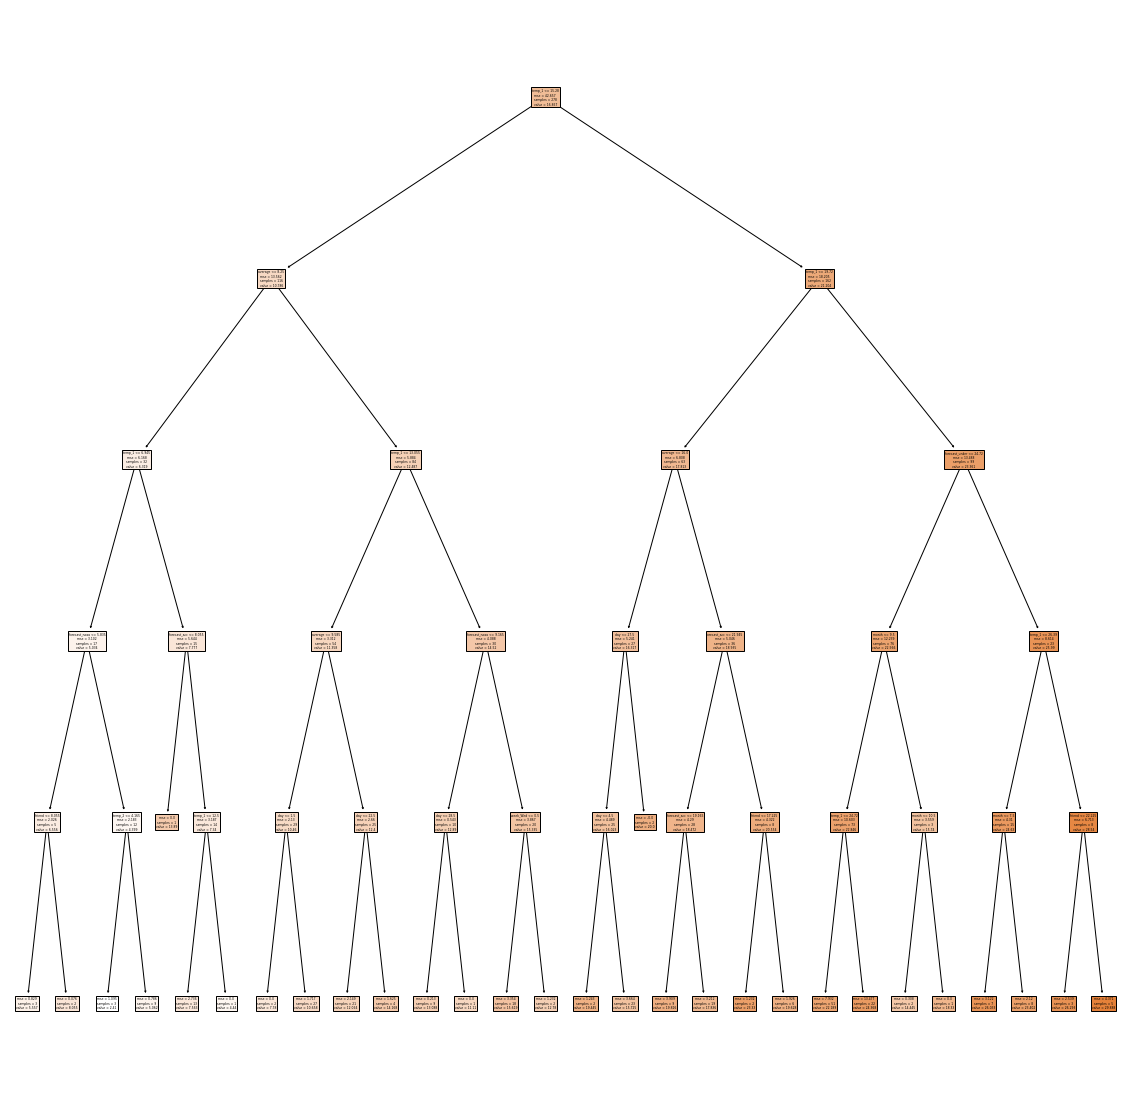

In [137]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(tree_reg,
                feature_names=datat.columns,
                class_names=datat['actual'],
                filled=True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [138]:
tree_reg = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
tree_reg.fit(X_train,y_train)   

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [139]:
tree_predic = tree_reg.predict(X_test)
tree_predic

array([22.56552632, 16.31740741, 11.35814815, 18.935     , 18.935     ,
       22.56552632, 22.56552632, 22.56552632, 16.31740741, 22.56552632,
       16.31740741, 22.56552632,  5.03352941, 16.31740741, 22.56552632,
       14.52      , 16.31740741, 11.35814815, 14.52      , 22.56552632,
       18.935     , 14.52      , 18.935     , 16.31740741, 14.52      ,
       11.35814815, 18.935     ,  7.77666667, 14.52      , 25.99      ,
       22.56552632, 18.935     , 14.52      , 25.99      , 25.99      ,
       16.31740741, 11.35814815, 11.35814815, 22.56552632,  7.77666667,
       22.56552632, 11.35814815, 22.56552632,  5.03352941, 16.31740741,
       22.56552632, 11.35814815, 25.99      , 11.35814815,  5.03352941,
        7.77666667,  5.03352941, 18.935     , 18.935     , 22.56552632,
       16.31740741, 14.52      , 14.52      , 11.35814815, 14.52      ,
       18.935     , 11.35814815, 16.31740741, 22.56552632, 16.31740741,
       14.52      , 22.56552632, 22.56552632, 25.99      ,  5.03

### 9. Vuelve a calcular su MAE

In [140]:
MAE = sklearn.metrics.mean_absolute_error(y_train, tree_reg.predict(X_train))

print('Mean absolute error train:', round(MAE,2), 'degrees')
#With 5_levels. MAE train: 1.5054923038785408 degrees

Mean absolute error train: 2.03 degrees


In [141]:
MAE = sklearn.metrics.mean_absolute_error(y_test, tree_predic)

print('Mean absolute error test:', round(MAE,2), 'degrees')
#With 5_levels. MAE test: 2.27 degrees

Mean absolute error test: 2.46 degrees


### 10. Vuelve a representar su árbol

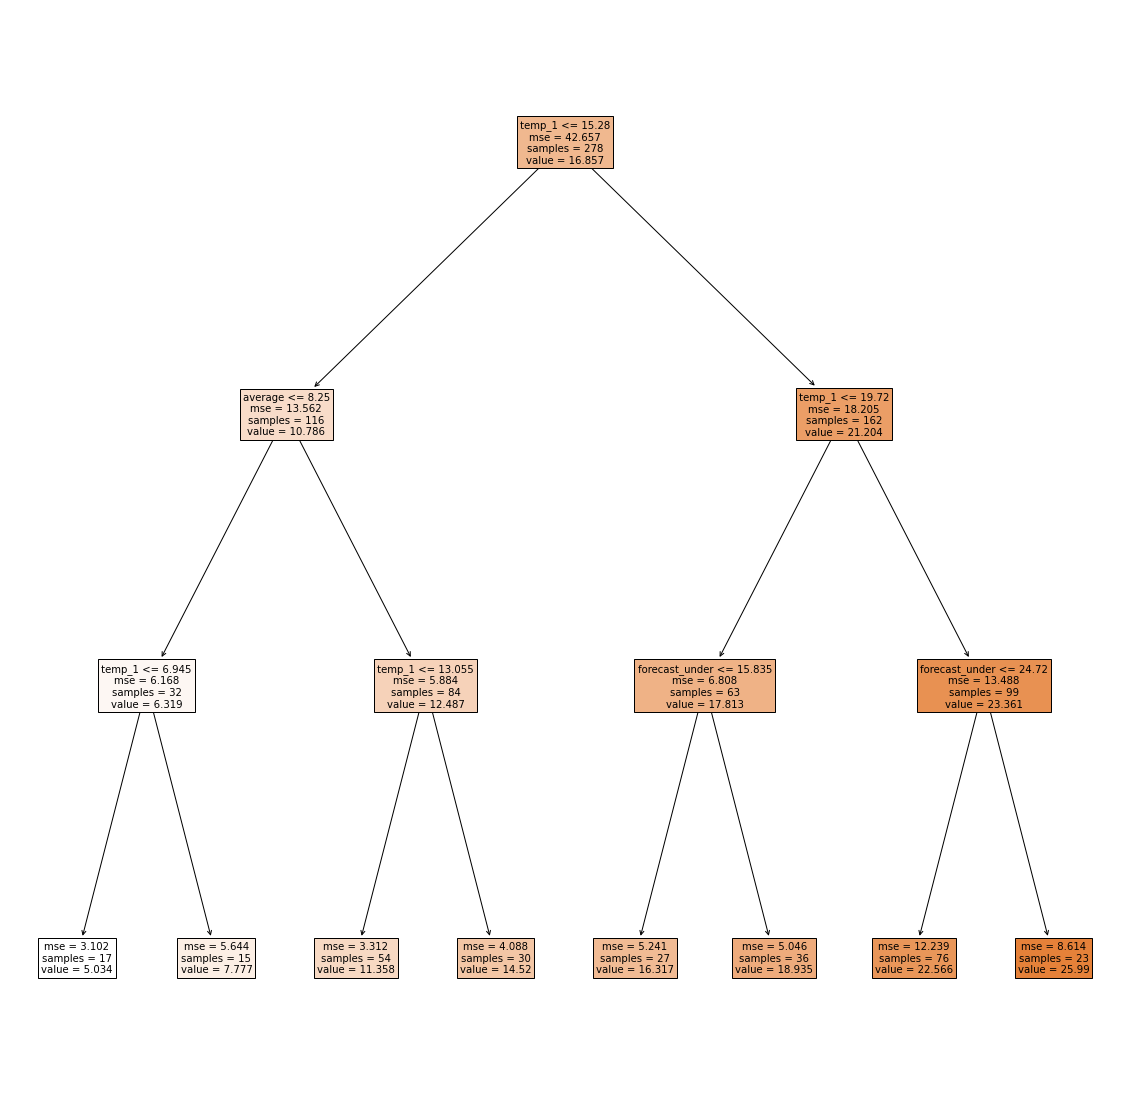

In [144]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(tree_reg,
                feature_names=datat.columns,
                class_names=datat['actual'],
                filled=True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [146]:
print(tree_reg.feature_importances_)
print('\n Important feature:',X_train.columns[[4,5,8]])

[0.         0.         0.         0.         0.880186   0.08843753
 0.         0.         0.03137646 0.         0.         0.
 0.         0.         0.         0.        ]

 Important feature: Index(['temp_1', 'average', 'forecast_under'], dtype='object')


In [157]:
(tree_reg.feature_importances_).sum()
#El atributo 'feature_importance_' muestra la importancia de las 'features' en porcentaje hasta un total de '100%'

0.9999999999999999

In [155]:
#Teacher table visulization 
import_dict = {'features':X_train.columns,
                'importance':tree_reg.feature_importances_}

pd.DataFrame(import_dict).sort_values('importance', ascending= False)

,features,importance
4,temp_1,0.880186
5,average,0.088438
8,forecast_under,0.031376
0,year,0.000000
1,month,0.000000
2,day,0.000000
3,temp_2,0.000000
6,forecast_noaa,0.000000
7,forecast_acc,0.000000
9,friend,0.000000
